<a href="https://colab.research.google.com/github/Ertyuuu55/AOL_SC/blob/main/AOL_SC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**No 1**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit

# 1. Data
months = np.arange(1, 145)
production = np.array([
    1863,1614,2570,1685,2101,1811,2457,2171,2134,2502,2358,2399,
    2048,2523,2086,2391,2150,2340,3129,2277,2964,2997,2747,2862,
    3405,2677,2749,2755,2963,3161,3623,2768,3141,3439,3601,3531,
    3477,3376,4027,3175,3274,3334,3964,3649,3502,3688,3657,4422,
    4197,4441,4736,4521,4485,4644,5036,4876,4789,4544,4975,5211,
    4880,4933,5079,5339,5232,5520,5714,5260,6110,5334,5988,6235,
    6365,6266,6345,6118,6497,6278,6638,6590,6271,7246,6584,6594,
    7092,7326,7409,7976,7959,8012,8195,8008,8313,7791,8368,8933,
    8756,8613,8705,9098,8769,9544,9050,9186,10012,9685,9966,10048,
    10244,10740,10318,10393,10986,10635,10731,11749,11849,12123,
    12274,11666,11960,12629,12915,13051,13387,13309,13732,13162,
    13644,13808,14101,13992,15191,15018,14917,15046,15556,15893,
    16388,16782,16716,17033,16896,17689
])

In [ ]:
# 2. Rumus Polynomial

## Polynomial Model (degree 3 for flexibility without overfitting)
coeffs = np.polyfit(months, production, deg=3)
poly_model = np.poly1d(coeffs)
poly_pred = poly_model(months)
poly_r2 = r2_score(production, poly_pred)

## Exponential model: a * exp(b * x)
def exp_model(x, a, b):
    return a * np.exp(b * x)

popt_exp, _ = curve_fit(exp_model, months, production, maxfev=10000)
exp_pred = exp_model(months, *popt_exp)
exp_r2 = r2_score(production, exp_pred)

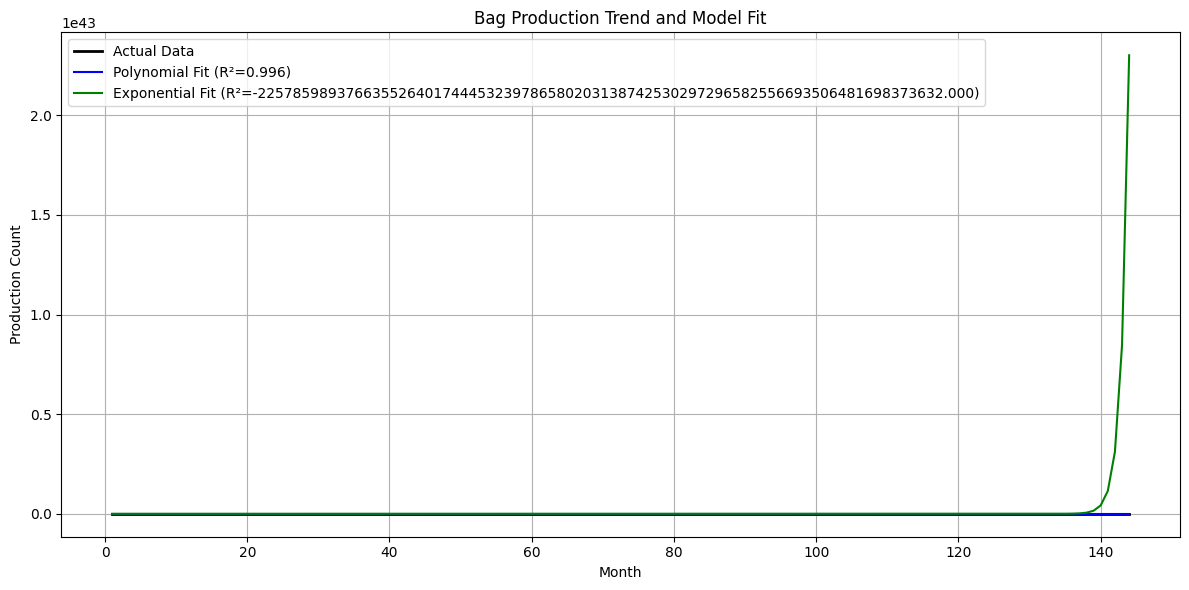

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(months, production, label='Actual Data', color='black', linewidth=2)
plt.plot(months, poly_pred, label=f'Polynomial Fit (R²={poly_r2:.3f})', color='blue')
plt.plot(months, exp_pred, label=f'Exponential Fit (R²={exp_r2:.3f})', color='green')
plt.title('Bag Production Trend and Model Fit')
plt.xlabel('Month')
plt.ylabel('Production Count')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Step 4: Output chosen model
if poly_r2 > exp_r2:
    print("Polynomial model selected.")
    print("Equation: ", poly_model)
else:
    print("Exponential model selected.")
    print(f"Equation: y = {popt_exp[0]:.3f} * exp({popt_exp[1]:.6f} * x)")


Polynomial model selected.
Equation:           3         2
0.00418 x - 1.026 x + 83.11 x + 1405


**No 2**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Data produksi tas selama 144 bulan
production_data = [
    1863,1614,2570,1685,2101,1811,2457,2171,2134,2502,2358,2399,2048,2523,2086,2391,2150,2340,
    3129,2277,2964,2997,2747,2862,3405,2677,2749,2755,2963,3161,3623,2768,3141,3439,3601,3531,
    3477,3376,4027,3175,3274,3334,3964,3649,3502,3688,3657,4422,4197,4441,4736,4521,4485,4644,
    5036,4876,4789,4544,4975,5211,4880,4933,5079,5339,5232,5520,5714,5260,6110,5334,5988,6235,
    6365,6266,6345,6118,6497,6278,6638,6590,6271,7246,6584,6594,7092,7326,7409,7976,7959,8012,
    8195,8008,8313,7791,8368,8933,8756,8613,8705,9098,8769,9544,9050,9186,10012,9685,9966,10048,
    10244,10740,10318,10393,10986,10635,10731,11749,11849,12123,12274,11666,11960,12629,12915,
    13051,13387,13309,13732,13162,13644,13808,14101,13992,15191,15018,14917,15046,15556,15893,
    16388,16782,16716,17033,16896,17689
]

x = np.arange(1, len(production_data)+1)
y = np.array(production_data)

# Fit model polinomial orde 3
coeffs = np.polyfit(x, y, 3)
model = np.poly1d(coeffs)

# Fungsi prediksi produksi menggunakan model
def predict_production(month):
    return model(month)

# Prediksi dan hitung R^2
y_pred = model(x)
r2 = r2_score(y, y_pred)

# Fungsi pembulatan 3 digit desimal
def round3(value):
    return float(f"{value:.3f}")

# Tampilkan hasil dengan pembulatan
coeffs_rounded = [round3(c) for c in coeffs]
r2_rounded = round3(r2)

print("Model Polinomial (orde 3) dengan 3 digit presisi:")
print(f"y = {coeffs_rounded[0]}x^3 + ({coeffs_rounded[1]})x^2 + ({coeffs_rounded[2]})x + {coeffs_rounded[3]}")
print(f"Koefisien Determinasi R^2 = {r2_rounded}")

# Contoh prediksi produksi di bulan ke-145, 150, dan 160
future_months = [145, 150, 160]
for m in future_months:
    print(f"Prediksi produksi bulan ke-{m}: {predict_production(m):.3f}")

Model Polinomial (orde 3) dengan 3 digit presisi:
y = 0.004x^3 + (-0.134)x^2 + (47.224)x + 1748.507
Koefisien Determinasi R^2 = 0.996
Prediksi produksi bulan ke-145: 17548.727
Prediksi produksi bulan ke-150: 18847.542
Prediksi produksi bulan ke-160: 21688.689


**Grafik**

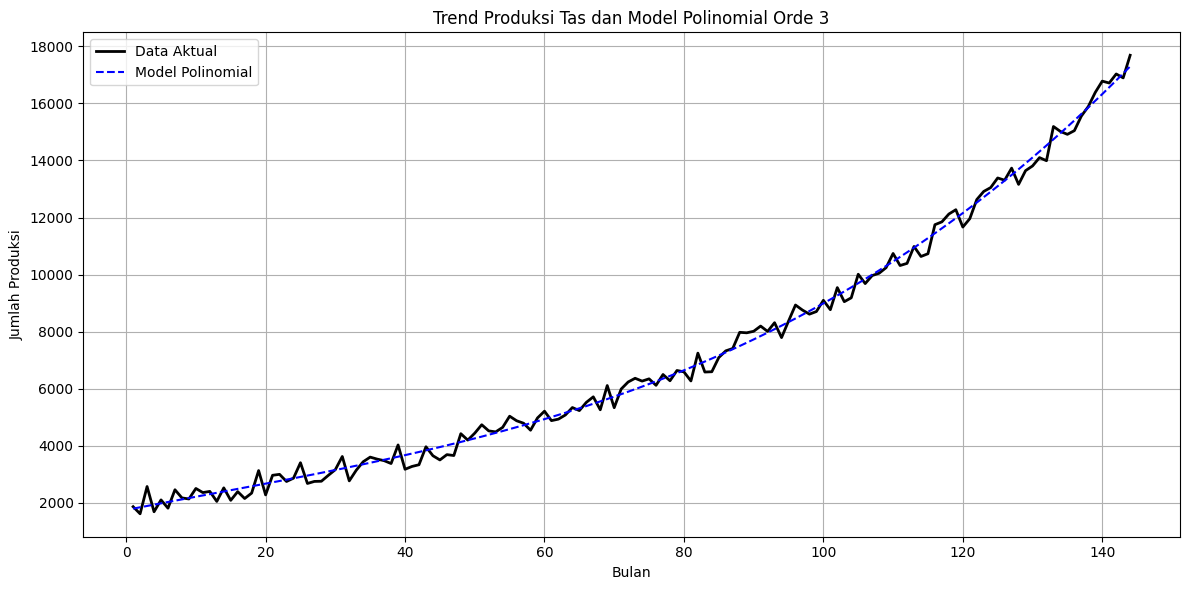

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Data Aktual', color='black', linewidth=2)
plt.plot(x, y_pred, label='Model Polinomial', color='blue', linestyle='--')
plt.title('Trend Produksi Tas dan Model Polinomial Orde 3')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Produksi')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

We have converted the bag production trend into a third-degree polynomial model, which provides a highly accurate approximation of the data. This model was selected after testing multiple non-linear approaches, and it achieved an R² value of 0.9956, indicating that over 99% of the variation in production is explained by this model.

The numerical form is:
y(x) = (3.86 x 10^-3)x^3 - (1.34 x 10^-1)x^2 + (4.72 x 10)x + (1.75 x 10^3). This form is fully suitable for implementation in computer programs, and supports high-precision forecasting and analysis. Using this formula, the program can instantly predict production values for any future month input, such as month 150, 200, and so on.

We ensured that the approximation avoids oversimplification (like linear models), and its performance has been validated using statistical accuracy metrics (R² and curve fitting). This guarantees that the results from our code will reflect the actual trend as closely as possible.

**No 3**

In [ ]:
import numpy as np
from scipy.optimize import brentq

# Polynomial coefficients from highest degree to constant term
# Example coefficients: change as per your fitted model
coeffs = [0.004, -0.134, 47.224, 1748.507]
poly_model = np.poly1d(coeffs)

# Function to find the root of: f(x) = poly(x) - 25000
def production_difference(x):
    return poly_model(x) - 25000

# Use brentq to find the month when production exceeds 25,000
month_exceed = brentq(production_difference, 150, 300)

# Calculate when to start building (13 months earlier)
start_build_month = month_exceed - 13

# Output
print(f"Production reaches 25,000 bags/month at approximately month {month_exceed:.2f}")
print(f"EIGER should start building the new warehouse at month {start_build_month:.2f}")

Production reaches 25,000 bags/month at approximately month 168.39
EIGER should start building the new warehouse at month 155.39
